In [1]:
x.shape

NameError: name 'x' is not defined

-> Olfacto loaded
['xyz', 'x', 'sf', 'label', 'channel']
(107, 2304, 46)
(2304, 46)
(2304,)


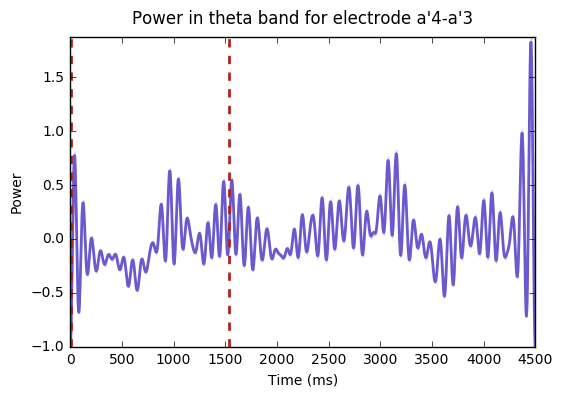

In [2]:
"""This script illustrate how you can simply plot your data."""
import numpy as np
import matplotlib.pyplot as plt
from os import path

from brainpipe.system import study
from brainpipe.visual import BorderPlot, addLines
from brainpipe.feature import power

# Define which condition / electrode / frequency to visualize
st = study('Olfacto')
file = 'CHAF_E1E2_concat_allfilter1_bipo.npz'
elec = 2  # The electrode to plot
# Power settings :
f, fname = [4, 8], 'theta'
baseline = (10, 1536)
norm = 3
# Load file :
loadname = path.join(st.path, 'database/TS_E_all_cond_by_block_trigs_th40_art400_30_250', file)
mat = np.load(loadname)
print (mat.files)
x = mat ['x']
print (x.shape)
x, sf, channel = mat['x'][elec, ...], int(mat['sf']), mat['channel']
# Get power :
#print('SHAPE OF x: ', x.shape)
powObj = power(sf, x.shape[0], f=f, baseline=baseline, norm=norm)
xpow = np.squeeze(powObj.get(x[np.newaxis, ...])[0])
print (xpow.shape)
#xpow = np.squeeze(powObj.get(x)[0])
# Finally plot you power :
time = 1000 * np.arange(x.shape[0]) / sf
print (time.shape)
BorderPlot(time, xpow, color='slateblue', kind='sem', xlabel='Time (ms)',
           ylabel='Power', title='Power in ' + fname + ' band for electrode '+channel[elec])
addLines(plt.gca(), vLines=baseline, vColor=[
         'firebrick'] * 2, vWidth=[2] * 2)
plt.show()
